<a href="https://colab.research.google.com/github/janaabunasser14/ENCS5141-INTELLIGENT-SYSTEMS-LAB/blob/main/ENCS5141_Exp7_Introduction_to_Deep_Learning_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

# Tensor Initialization

In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [5]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.5892, 0.3233],
        [0.9715, 0.1850]]) 



In [6]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9433, 0.5349, 0.2244],
        [0.7923, 0.7921, 0.6560]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


# Tensor Attributes

In [7]:
tensor = torch.rand(3, 4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


# Tensor Operations

In [8]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

In [9]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [10]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [11]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [12]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [13]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


# Bridge with NumPy

In [14]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [15]:
n = np.ones(5)
t = torch.from_numpy(n)
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# Differentiation in Autograd

In [16]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [19]:
Q = 3*a**3 - b**2

In [18]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)


False
False


## Task 1

In [20]:
import torch
# point x1, x2 (1, 1)
x1 = torch.tensor(1., requires_grad=True)
x2 = torch.tensor(1., requires_grad=True)

In [21]:
Q = (3*x1 - 2*x2 - 2) ** 2

In [22]:
external_grad = torch.tensor(1.)
Q.backward(gradient=external_grad)

In [58]:
# check if collected gradients are correct
# Manually differenatiated
dx1 = 2 * (3*x1 - 2*x2 - 2) * (3)
dx2 = 2 * (3*x1 - 2*x2 - 2) * (-2)

print(dx1 == x1.grad)
print(dx2 == x2.grad)


tensor(True)
tensor(True)


# Define the network

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    # an affine operation: y = Wx + b
    # 784 is the input dimension, and 68 is the output dimenstion of the first hidden layer
    self.fc1 = nn.Linear(784, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    # apply the first layer with relu activation
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [25]:
params = list(net.parameters())
print(len(params))

for p in params:
  print(p.size())

6
torch.Size([64, 784])
torch.Size([64])
torch.Size([64, 64])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


Task 2: Identify what are the parameters that are printed in the previous code

torch.Size([64, 784]): This represents the weight matrix for the first layer of the neural network. It has a size of 64 (output features) by 784 (input features).

torch.Size([64]): This represents the bias vector for the first layer. It has a size of 64, corresponding to the number of output features in the first layer.

torch.Size([64, 64]): This represents the weight matrix for the second layer of the neural network. It has a size of 64 (output features) by 64 (input features).

torch.Size([64]): This represents the bias vector for the second layer. It has a size of 64, corresponding to the number of output features in the second layer.

torch.Size([10, 64]): This represents the weight matrix for the third (output) layer of the neural network. It has a size of 10 (output classes) by 64 (input features from the previous layer).

torch.Size([10]): This represents the bias vector for the third layer. It has a size of 10, corresponding to the number of output classes in the network.



In [26]:
input = torch.randn(1, 784)
out = net(input)

print(out)

tensor([[ 0.1032, -0.0130,  0.0800,  0.0086,  0.1499, -0.0672, -0.0532,  0.1655,
         -0.0401, -0.0982]], grad_fn=<AddmmBackward0>)


Task 3: Try the previous network with a random mini-batch of size 4 and print its output.

In [27]:
input = torch.randn(4, 784)
out = net(input)

print(out)

tensor([[ 0.1046, -0.0651,  0.0638,  0.0518,  0.2444, -0.0800, -0.0390,  0.1712,
         -0.0713, -0.0350],
        [ 0.1547,  0.0007,  0.1070,  0.0341,  0.1684, -0.0978,  0.0178,  0.0468,
         -0.0056, -0.1023],
        [ 0.1282, -0.0657,  0.0964, -0.0005,  0.1582,  0.1131,  0.0791,  0.1187,
         -0.0837, -0.0132],
        [ 0.3379,  0.0307,  0.0415,  0.0475,  0.2194, -0.0688,  0.0675,  0.0172,
          0.2189, -0.2463]], grad_fn=<AddmmBackward0>)


# Define a Loss function and optimizer

In [28]:
import torch.optim as optim

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

# Loading a Dataset

In [29]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.MNIST(
  root="data",
  train=True,
  download=True,
  transform=ToTensor()
)

test_data = datasets.MNIST(
  root="data",
  train=False,
  download=True,
  transform=ToTensor()
)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:00<00:00, 50789606.05it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 28881/28881 [00:00<00:00, 1646849.94it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:00<00:00, 13081159.69it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 4542/4542 [00:00<00:00, 4025893.65it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



# Iterating and Visualizing the Dataset

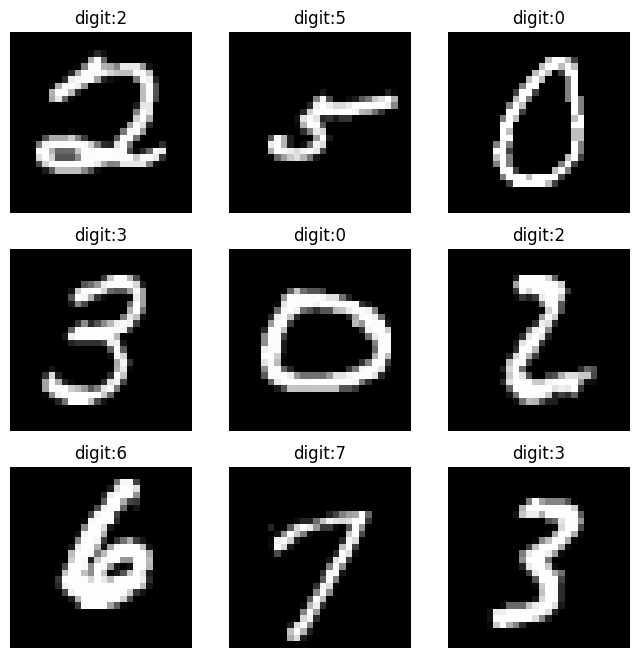

In [30]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title("digit:" + str(label))
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Preparing your data for training with DataLoaders

In [31]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=4, shuffle=True)

# Iterate through the DataLoader

Feature batch shape: torch.Size([4, 1, 28, 28])
Labels batch shape: torch.Size([4])


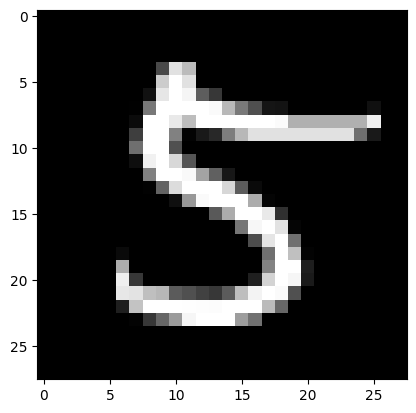

Label: 5


In [32]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Train the network

In [33]:
for epoch in range(2): # loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(train_dataloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(torch.flatten(inputs,1))
    iteration_loss = loss(outputs, labels)
    iteration_loss.backward()
    optimizer.step()

    # print statistics
    running_loss += iteration_loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.285
[1,  4000] loss: 2.209
[1,  6000] loss: 1.993
[1,  8000] loss: 1.502
[1, 10000] loss: 1.004
[1, 12000] loss: 0.776
[1, 14000] loss: 0.631
[2,  2000] loss: 0.533
[2,  4000] loss: 0.483
[2,  6000] loss: 0.459
[2,  8000] loss: 0.427
[2, 10000] loss: 0.418
[2, 12000] loss: 0.400
[2, 14000] loss: 0.396
Finished Training


Task 4: What is the meaning of epoch, forward pass, backward pass. What is the effect of torch.flatten(inputs, 1), and optimizer.step()?

Epoch: An epoch is a single pass through the entire training dataset. The outer loop for epoch in range(2) indicates that the training process will loop over the dataset two times.

Forward Pass: The forward pass is the process of passing input data through the neural network to compute the predicted outputs. In this code, outputs = net(torch.flatten(inputs, 1)) represents the forward pass, where inputs are passed through the neural network (net) after being flattened along the second dimension using torch.flatten(inputs, 1).

Backward Pass: The backward pass, also known as backpropagation, is the process of computing gradients of the loss function with respect to the network's parameters. This is done using the backward() method: iteration_loss.backward(). It computes gradients for all the tensors used to compute iteration_loss.

Optimizer: optimizer.step() updates the parameters of the neural network using the computed gradients and the optimization algorithm (e.g., SGD, Adam) to minimize the loss. It adjusts the network's weights and biases based on the computed gradients and the specified optimization strategy.

torch.flatten(inputs, 1): This function reshapes the input tensor inputs to have a flattened shape along the second dimension (dimension 1). It's likely used to prepare the input data for the neural network if it expects a flattened representation.

In [35]:
PATH = './my_net.pth'
torch.save(net.state_dict(), PATH)

# Test the network on the test data

In [36]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [37]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    # calculate outputs by running images through the network
    outputs = net(torch.flatten(images,1))
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 11 %


Task 5: Train the network in the previous example, but instead of using 2 hidden layers, try 3 hidden layers.

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Assuming net is the previously defined neural network with 2 hidden layers

class ThreeHiddenLayerNet(nn.Module):
    def __init__(self):
        super(ThreeHiddenLayerNet, self).__init__()
        self.fc1 = nn.Linear(784, 64)  # First hidden layer
        self.fc2 = nn.Linear(64, 64)   # Second hidden layer
        self.fc3 = nn.Linear(64, 64)   # Third hidden layer
        self.fc4 = nn.Linear(64, 10)   # Output layer

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))   # ReLU activation for first hidden layer
        x = torch.relu(self.fc2(x))   # ReLU activation for second hidden layer
        x = torch.relu(self.fc3(x))   # ReLU activation for third hidden layer
        x = self.fc4(x)               # Output layer without activation (for example, using CrossEntropyLoss)

In [46]:
# Setup data loaders
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define the neural network model
class ThreeHiddenLayerNet(nn.Module):
    def __init__(self):
        super(ThreeHiddenLayerNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Example for MNIST dataset, 28*28 = 784 input features
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)    # Output layer for 10 classes

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x



# Initialize the network
net = ThreeHiddenLayerNet()

# Define the loss function and optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

# Training the network
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        inputs = torch.flatten(inputs, start_dim=1)  # Flatten the images
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        iteration_loss = loss(outputs, labels)
        iteration_loss.backward()
        optimizer.step()

        # print statistics
        running_loss += iteration_loss.item()
        if i % 200 == 199:  # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

# Testing the network
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        images = torch.flatten(images, start_dim=1)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


[1,   200] loss: 2.295
[1,   400] loss: 2.290
[1,   600] loss: 2.283
[1,   800] loss: 2.275
[2,   200] loss: 2.261
[2,   400] loss: 2.250
[2,   600] loss: 2.239
[2,   800] loss: 2.224
Finished Training
Accuracy of the network on the 10000 test images: 32 %


Task 6: Train the network in the previous example using Adam optimizer

In [ ]:
# Initialize the network
net = ThreeHiddenLayerNet()

# Use Adam optimizer with a learning rate of 0.001
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Assuming train_dataloader contains your training dataset
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        iteration_loss = loss(outputs, labels)
        iteration_loss.backward()
        optimizer.step()
        running_loss += iteration_loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    # calculate outputs by running images through the network
    outputs = net(torch.flatten(images,1))
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

# Training on GPU

In [51]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cpu


In [52]:
net = Net()

net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Task 7: Train the network in the previous example on GPU. Do you notice significant speedup? if not, try to increase the size of your network.

First, we try on small network.

In [53]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

for epoch in range(2): # loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(train_dataloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data[0].to(device), data[1].to(device)
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(torch.flatten(inputs,1))
    iteration_loss = loss(outputs, labels)
    iteration_loss.backward()
    optimizer.step()

    # print statistics
    running_loss += iteration_loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0

print('Finished Training')

Finished Training


CPU time: 46s

GPU time: 56s

We can't see the speedup, even CPU is faster. So, we will increase the size of the network as follows:

In [54]:
class LargerThreeHiddenLayerNet(nn.Module):
    def __init__(self):
        super(LargerThreeHiddenLayerNet, self).__init__()
        self.fc1 = nn.Linear(784, 512)  # First hidden layer with 128 neurons
        self.fc2 = nn.Linear(512, 512)  # Second hidden layer with 128 neurons
        self.fc3 = nn.Linear(512, 10)   # Output layer with 10 neurons

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))   # ReLU activation for first hidden layer
        x = torch.relu(self.fc2(x))   # ReLU activation for second hidden layer
        x = self.fc3(x)               # Output layer without activation (for example, using CrossEntropyLoss)
        return x

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Assuming net is the previously defined neural network with 3 hidden layers

# Check if GPU is available and set the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Training on {device}")

# Initialize the larger network and move it to the device (GPU if available)
net = LargerThreeHiddenLayerNet().to(device)

# Define the loss function
loss = nn.CrossEntropyLoss()

# Use Adam optimizer with a learning rate of 0.001
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Assuming train_dataloader contains your training dataset
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        # Move the inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        iteration_loss = loss(outputs, labels)
        iteration_loss.backward()
        optimizer.step()
        running_loss += iteration_loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Training on cpu
Finished Training


GPU time: 1m 17s

CPU time: 7m 28s

Now, we can see the huge difference between the run on CPU and GPU